In [13]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from data_loader import data_loader, compare_race_ethnicity_groups

In [14]:
# read in the data 
df = data_loader()

/var/folders/7z/qtj72qjn2bqfnx7cd8w8n9vm0000gn/T/ipykernel_16811/3537300841.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['action_taken'] = df_filtered['action_taken'].replace({1: 'Approved', 3: 'Denied'})


Action Taken:
 1. Loan originated
 2. Application approved but not accepted
 3. Application denied by financial institution
 4. Application withdrawn by applicant
 5. File closed for incompleteness
 6. Loan purchased by the institution
 7. Preapproval request denied by financial institution
 8. Preapproval request approved but not accepted (optional reporting)

 4-8 are not intresting in terms of investigating possible bias

1 and 3 seem like natural opposites, while 2 doesn't entirely fit on a continium between the two. What to do? 

action_taken
Approved        5142
Denied          1339
dtype: int64


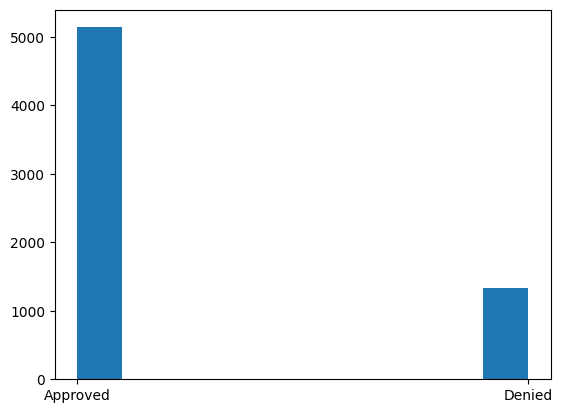

In [6]:
# hist of pd series 
plt.hist(df_filtered[['action_taken']])
print(df_filtered[['action_taken']].value_counts())
plt.show()

### Curated the race feature 
- How does ethnicity variable relate to race? 
    - Ethnicity variable only encodes hispanic or not hispanic ethnicity, and the vast majority of latinos are put down as white 
    - We want to seperate whites and whites of hispanic ethnicity 

(array([ 16.,   0.,   6.,   0.,  18.,   0.,   5.,   0., 773.,  85.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

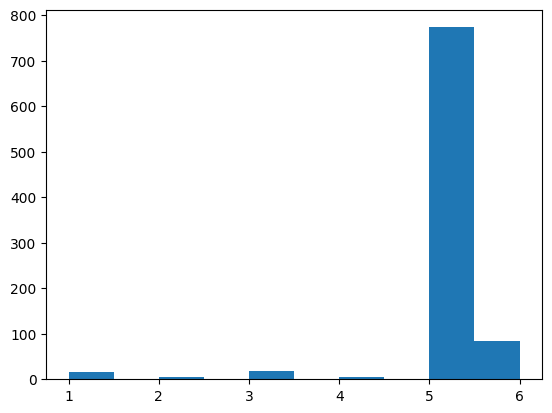

In [4]:
# finding out what race people with latino ethnicity put down
# seems large majority put down white 
# df[df['applicant_ethnicity'] == 1][['applicant_race_1']].value_counts()
plt.hist(df[df['applicant_ethnicity'] == 1][['applicant_race_1']])

People don't seem to encode a second ethnicity (only 49 out 10 0000 people).

Therefore doesn't seem that important to include this information in the race feature for now atleast

In [5]:
# nans in the columns reveal not many people put themselves down as having multiple races
df.isna().sum()[['applicant_race_2','applicant_race_3','applicant_race_4','applicant_race_5']]

applicant_race_2     9951
applicant_race_3     9999
applicant_race_4    10000
applicant_race_5    10000
dtype: int64

### Compare feature distribution in terms of race and/or gender

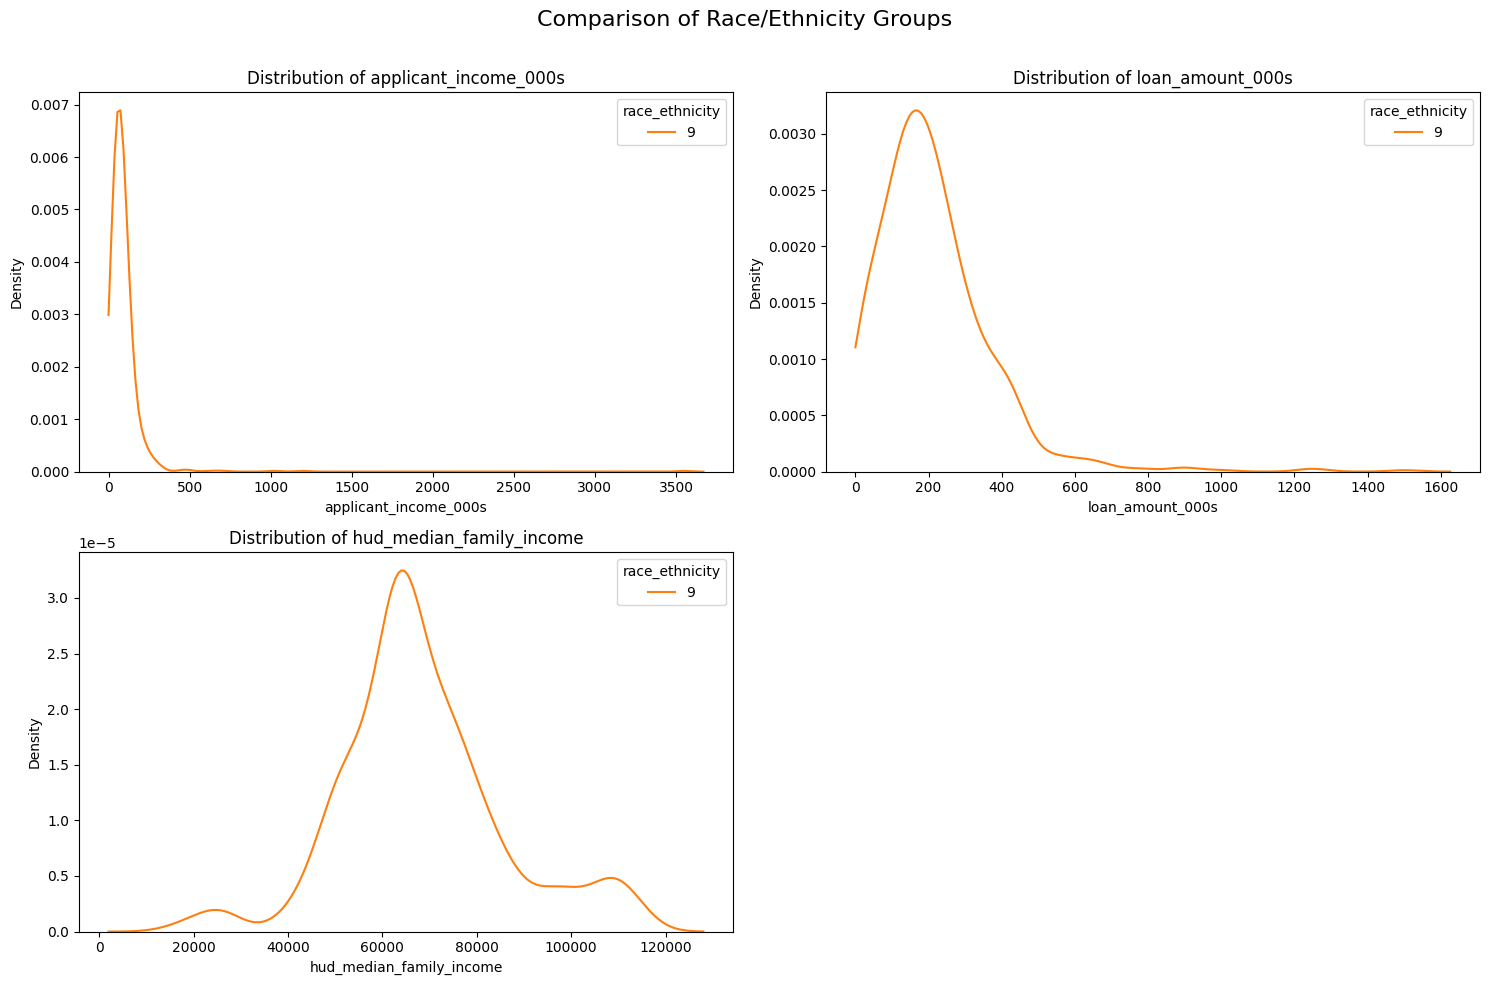

In [6]:
# Replace 'your_dataframe' with the actual DataFrame variable
race_ethnicity_col = 'race_ethnicity'
groups = [5, 9]
features = ['applicant_income_000s', 'loan_amount_000s', 'hud_median_family_income']

compare_race_ethnicity_groups(df, race_ethnicity_col, groups, features)


### Curate the sexy variable
Sex:
 1. Male
 2. Female
 3. Information not provided by applicant in mail, Internet, or telephone application
 4. Not applicable
 5. No co-applicant

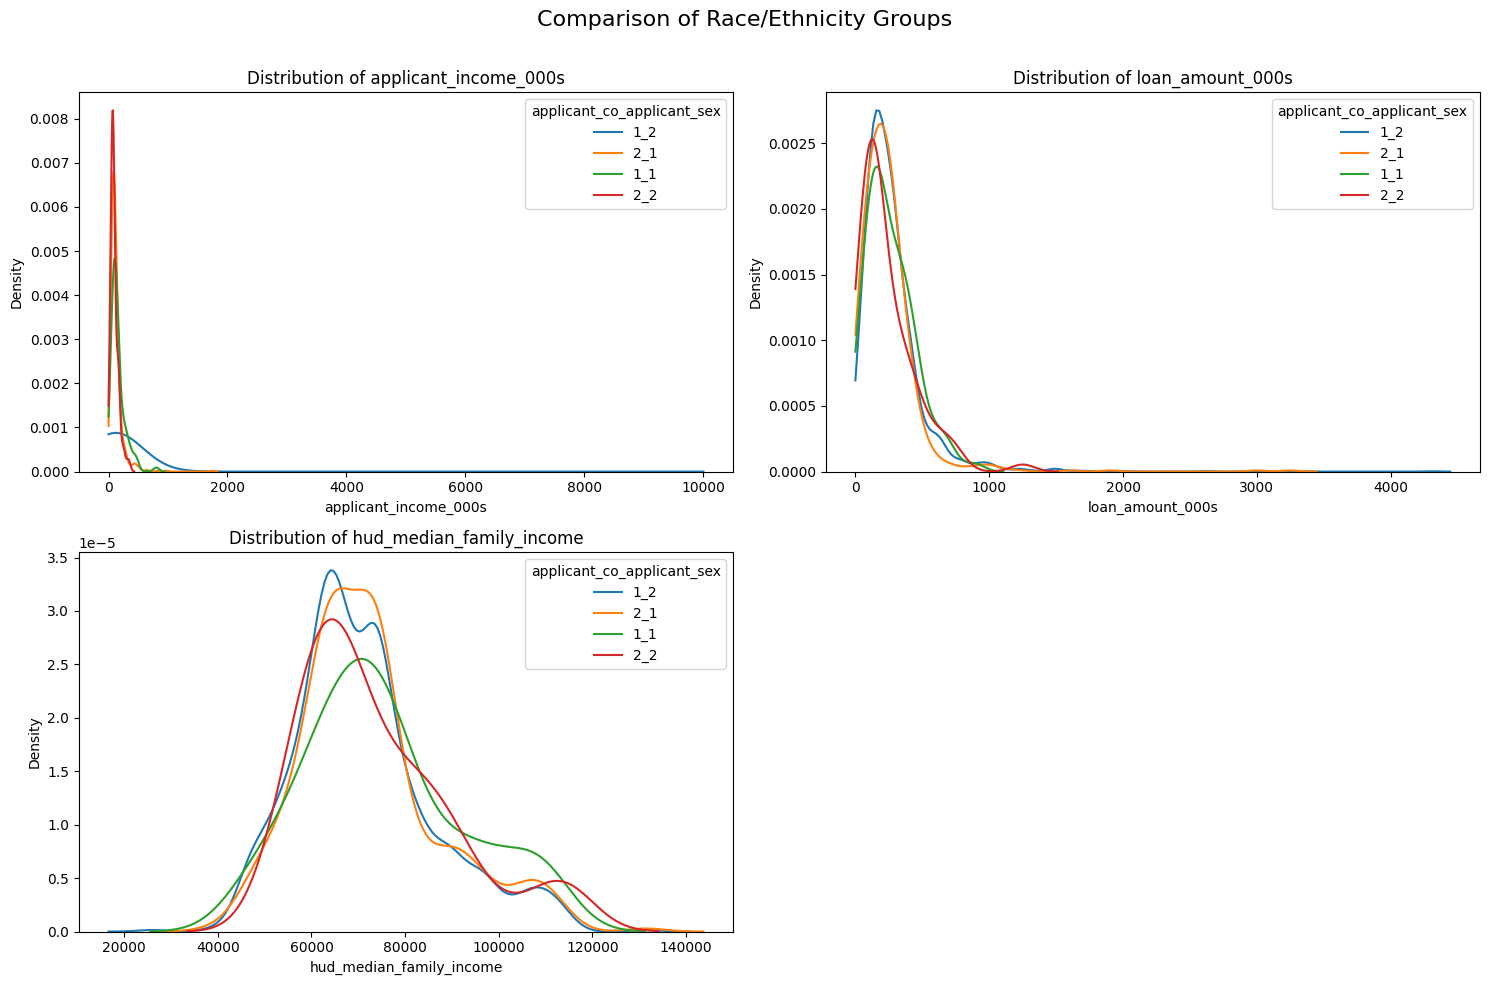

In [8]:
race_ethnicity_col = 'applicant_co_applicant_sex'
groups = ['1_2', '2_1', '1_1', '2_2']
features = ['applicant_income_000s', 'loan_amount_000s', 'hud_median_family_income']

compare_race_ethnicity_groups(df, race_ethnicity_col, groups, features)